<a href="https://colab.research.google.com/github/Tao4free/Python/blob/master/work_with_googlecolab/animation_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

L = 1				# Number of lanes
C = 15				# Number of cells in road
fig, ax = plt.subplots()	# Create figure
a = np.zeros((L,C))		# Create zero array of dimensions L,C
count = 0			# Used for loop
x = 0				# Car position

def animate(c):
    global count, x, i
    if x == C-1:		#[2] If in last cell
        a[L-1,C-1] = 0		# 0 last cell
        a[L-1,0] = 1		# 1 first cell
        x = 0			# Start iterating from 0
    else:
        if count == 0:		#[0] On 1st iteration
            a[L-1,0] = 1	# Put car @ a[0]
            count += 1
        else:			#[1]
            a[L-1,x] = 0	# 0 previous cell
            x += 1
            a[L-1,x] = 1	# 1 in current cell
    ax.clear()
    plt.close()
    ax.imshow(a, cmap=plt.cm.gray, interpolation='nearest')
    return ax


anim = animation.FuncAnimation(fig, animate, interval=100, blit=False)
rc('animation', html='jshtml')
anim

Starting


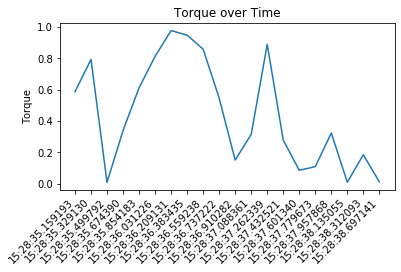

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import random
from matplotlib import animation, rc
from IPython.display import HTML


class Animate:

    def __init__(self, sensor):
        # Create figure for plotting
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(1, 1, 1)
        self.xs = []
        self.ys = []
        self.ylabel = sensor
        self.readings = 20

    # This function is called periodically from FuncAnimation
    def _update(self, i):

        # Read temperature (Celsius) from TMP102
        temp_c = random()

        # Add x and y to lists
        self.xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
        self.ys.append(temp_c)

        # Limit x and y lists to 20 items
        self.xs = self.xs[-self.readings:]
        self.ys = self.ys[-self.readings:]

        # Draw x and y lists
        self.ax.clear()
        self.ax.plot(self.xs, self.ys)

        # Format plot
        plt.xticks(rotation=45, ha='right')
        plt.subplots_adjust(bottom=0.30)
        plt.title(self.ylabel + ' over Time')
        plt.ylabel(self.ylabel)

    def start(self):
        print('Starting')
        # Set up plot to call animate() function periodically
        self.anim = animation.FuncAnimation(self.fig, self._update, interval=200)
        # plt.show()



rand = Animate('Torque')
rand.start()
rc('animation', html='jshtml')
rand.anim

In [6]:
# ------------------------------ #
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from matplotlib import animation, rc
from IPython.display import HTML
# ------------------------------ #
class AniPlot():
    def __init__(self):
        self.fig = plt.figure()
        self.ax = plt.axes(xlim=(-3.5, 3.5), ylim=(-5, 2))
        self.line, = self.ax.plot([], [], lw=2)
        plt.close()


    def set_data(self,tvector):
        self.data = tvector

    def ani_init(self):
        self.line.set_data([], [])
        return self.line,

    def ani_update(self, i):
        x = self.data[i][0]
        y = self.data[i][1]

        self.line.set_data(x, y)
        return self.line,


    def animate(self):
        self.anim = animation.FuncAnimation(self.fig, self.ani_update, init_func=self.ani_init,
                               frames=4, interval=20, blit=True)
        # plt.show()

# ------------------------------ #

data = [
[[0,0,1,0],[0,-1,-2,-3]],
[[0,0,0,0.1],[0,-1,-3,-4]],
[[0,0,0.5,0],[0,-1,-2.5,-3.5]],
[[0,0,1,2],[0,-1,-2,-2.5]]
        ]
myani = AniPlot()
myani.set_data(data)
myani.animate()
myani.anim